In [1]:
%load_ext autoreload
%autoreload 2
from utils import *

In [2]:
import sklearn
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("csv/breast_cancer.csv")

In [4]:
df.sample(5)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
17,no-recurrence-events,50-59,premeno,30-34,0-2,no,3,left,left_low,no
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
245,recurrence-events,30-39,premeno,30-34,9-11,no,2,right,left_up,yes
143,no-recurrence-events,40-49,premeno,45-49,0-2,no,2,left,left_low,yes
50,no-recurrence-events,50-59,lt40,15-19,0-2,no,2,left,left_low,no


In [5]:
df.shape

(286, 10)

In [6]:
print("class : ", np.unique(df['class'].values))
print("age : ", np.unique(df['age'].values))
print("menopause : ", np.unique(df['menopause'].values))
print("tumor-size : ", np.unique(df['tumor-size'].values))
print("inv-nodes : ", np.unique(df['inv-nodes'].values))
print("node-caps : ", np.unique(df['node-caps'].values))
print("deg-malig : ", np.unique(df['deg-malig'].values))
print("breast : ", np.unique(df['breast'].values))
print("breast-quad : ", np.unique(df['breast-quad'].values))
print("irradiat : ", np.unique(df['irradiat'].values))

class :  ['no-recurrence-events' 'recurrence-events']
age :  ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79']
menopause :  ['ge40' 'lt40' 'premeno']
tumor-size :  ['0-4' '10-14' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49'
 '5-9' '50-54']
inv-nodes :  ['0-2' '12-14' '15-17' '24-26' '3-5' '6-8' '9-11']
node-caps :  ['?' 'no' 'yes']
deg-malig :  [1 2 3]
breast :  ['left' 'right']
breast-quad :  ['?' 'central' 'left_low' 'left_up' 'right_low' 'right_up']
irradiat :  ['no' 'yes']


In [7]:
df = df[(df['node-caps'] != '?') & (df['breast-quad'] != '?')]
df.shape

(277, 10)

In [8]:
df.loc[df['class'] == 'recurrence-events','class'] = 1
df.loc[df['class'] == 'no-recurrence-events','class'] = 2

In [9]:
df.loc[df['age'] == '20-29','age'] = 1
df.loc[df['age'] == '30-39','age'] = 2
df.loc[df['age'] == '40-49','age'] = 3
df.loc[df['age'] == '50-59','age'] = 4
df.loc[df['age'] == '60-69','age'] = 5
df.loc[df['age'] == '70-79','age'] = 6

In [10]:
df.loc[df['menopause'] == 'lt40','menopause'] = 1
df.loc[df['menopause'] == 'ge40','menopause'] = 2
df.loc[df['menopause'] == 'premeno','menopause'] = 3

In [11]:
tumorsize_values = np.array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54'])

for i in range(len(tumorsize_values)):
    tumorsize = tumorsize_values[i]
    df.loc[df['tumor-size'] == tumorsize, 'tumor-size'] = i+1

In [12]:
invnodes_values = np.array(['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26'])

for i in range(len(invnodes_values)):
    invnode = invnodes_values[i]
    df.loc[df['inv-nodes'] == invnode, 'inv-nodes'] = i+1

In [13]:
df.loc[df['node-caps'] == 'no','node-caps'] = 0
df.loc[df['node-caps'] == 'yes','node-caps'] = 1

In [14]:
df.loc[df['irradiat'] == 'no','irradiat'] = 0
df.loc[df['irradiat'] == 'yes','irradiat'] = 1

In [15]:
df.loc[df['breast'] == 'left','breast'] = 0
df.loc[df['breast'] == 'right','breast'] = 1

In [16]:
df.loc[df['breast-quad'] == 'left_up','breast-quad'] = 1
df.loc[df['breast-quad'] == 'left_low','breast-quad'] = 2
df.loc[df['breast-quad'] == 'right_up','breast-quad'] = 3
df.loc[df['breast-quad'] == 'right_low','breast-quad'] = 4
df.loc[df['breast-quad'] == 'central','breast-quad'] = 5

In [17]:
#df.drop(['breast', 'breast-quad'], axis=1, inplace=True) # keep ordinal values only
df.sample(5)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
189,2,4,2,5,1,1,2,1,1,0
246,1,2,3,4,3,1,3,0,2,1
200,2,5,2,6,1,0,3,1,2,0
105,2,3,3,7,1,0,1,1,1,0
195,2,4,2,8,1,0,2,0,1,0


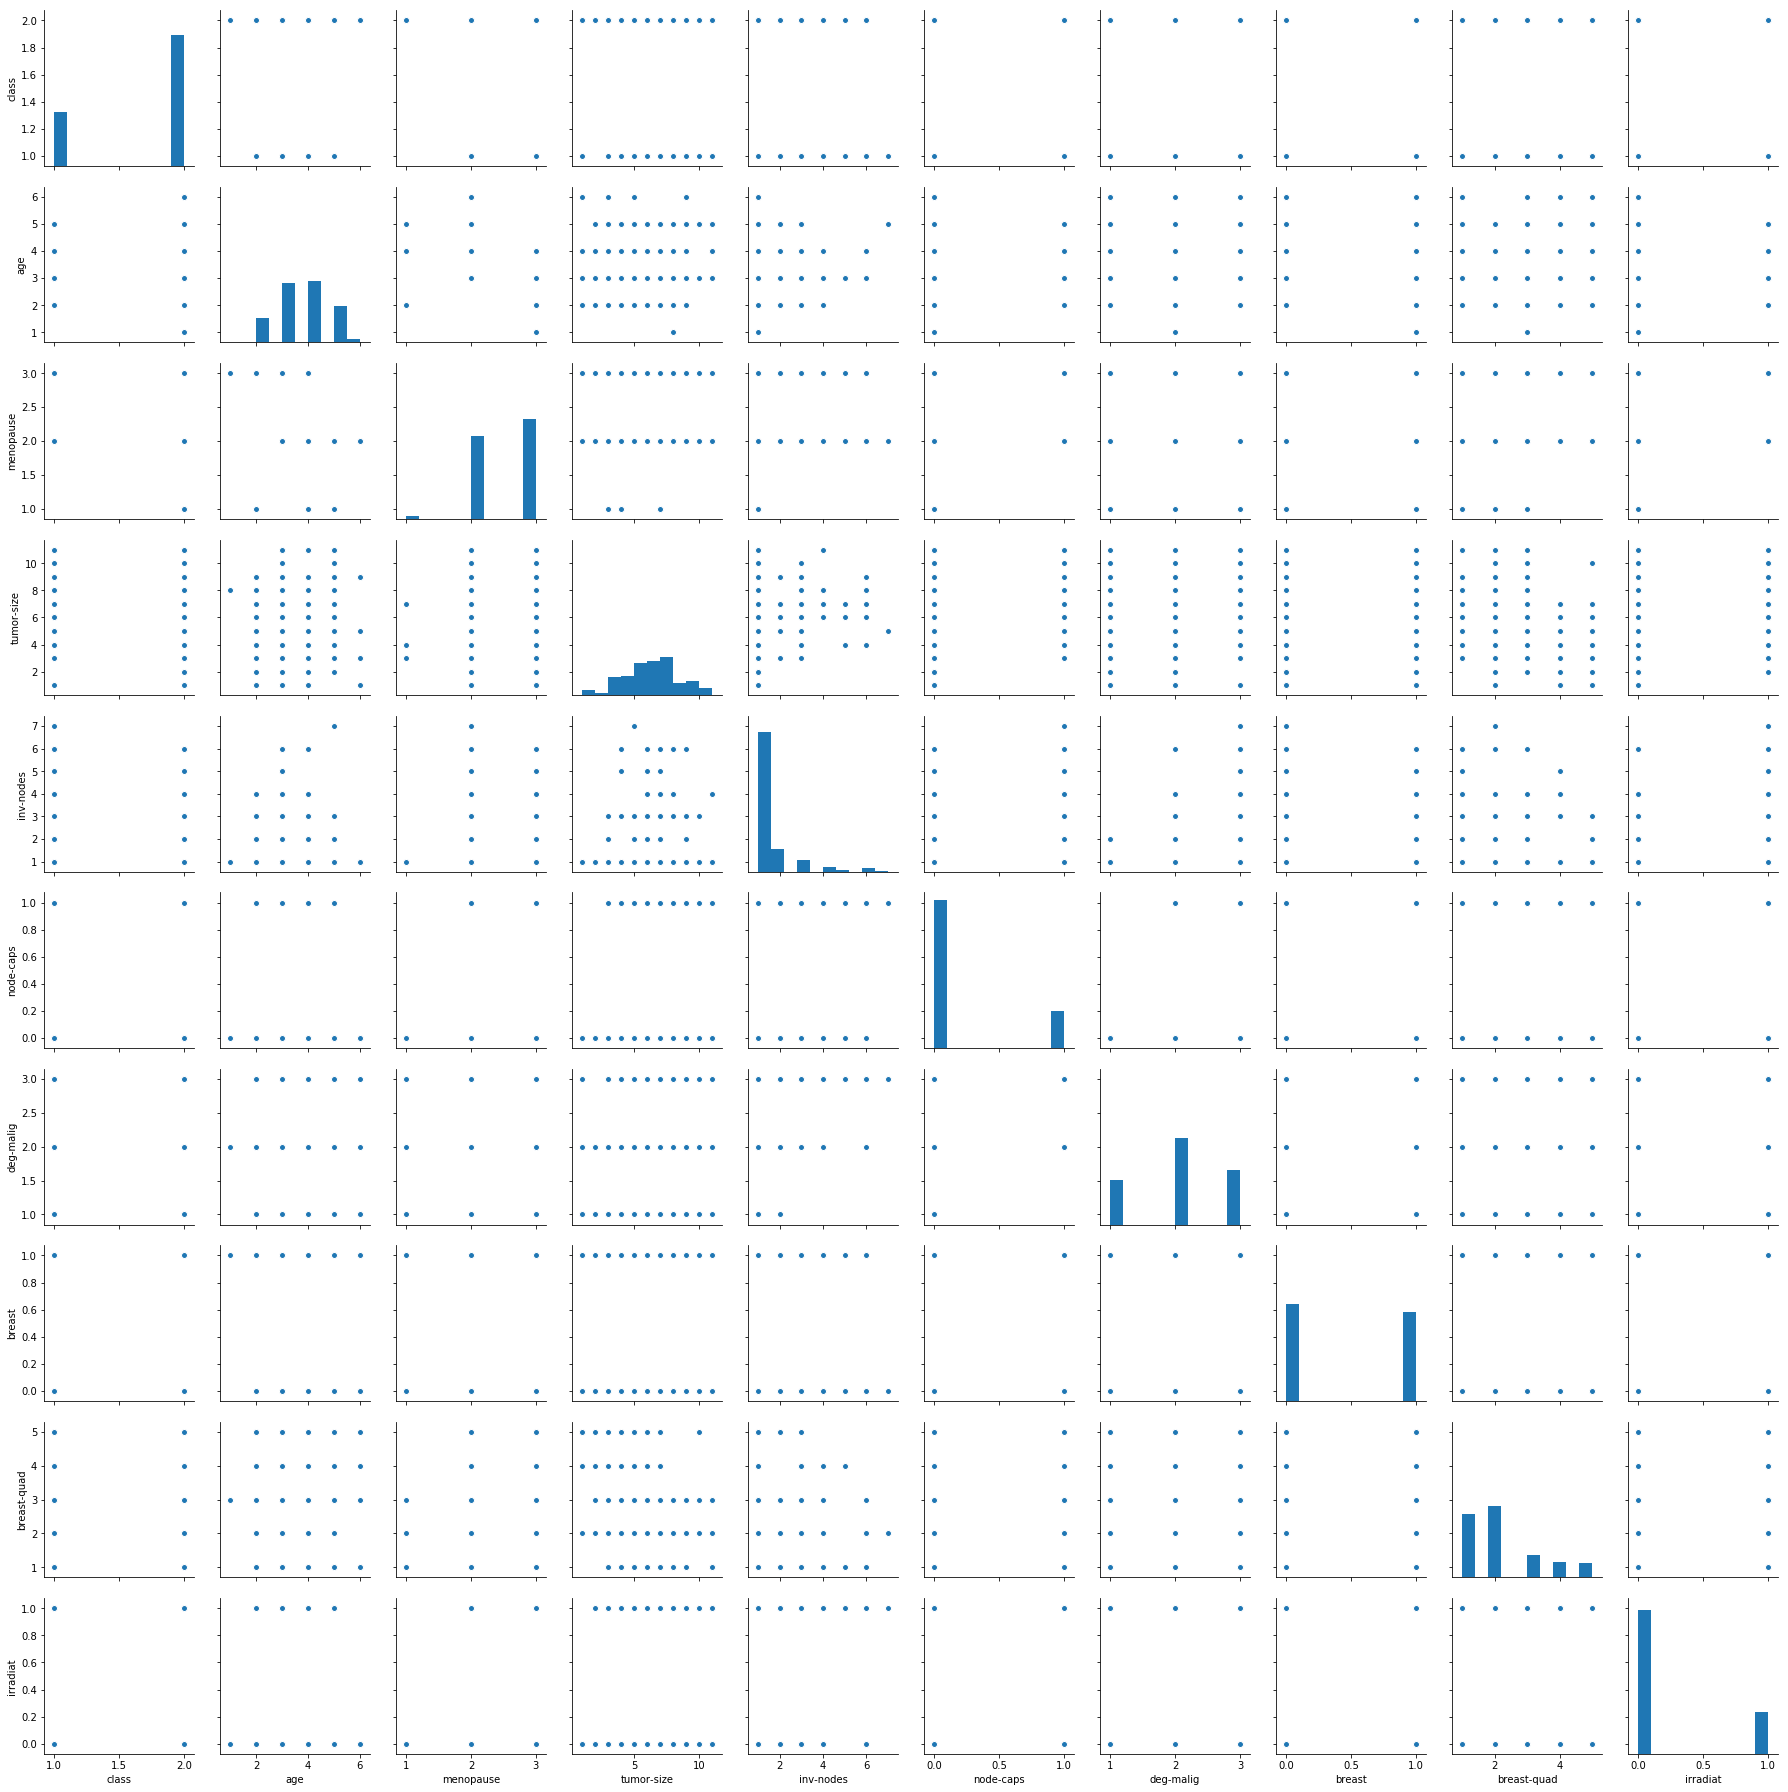

In [40]:
sns.pairplot(df)

In [18]:
vectors = df.values

In [19]:
m = 9

In [20]:
dataset = LabeledSet(m)
dataset.addExamples(vectors[:,1:], vectors[:,0:1])

In [44]:
NMI1(dataset)

0.03523779626432271

In [21]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

# pessimistic rank discrimination measure
f_p = Mindsr()
g_p = Frac() 
prdm = Gdm(h, g_p, f_p)

# rank Gini discrimination measure 
g_g = One_minus()
rgdm = Gdm(h, g_g, f_r)

# Gini discrimination measure
gdm = Gdm(h, g_g, f)

# H_M
h_m = Max()
g_m = One_minus_square()
H_m = Gdm(h_m, g_m, f_r)

# H_Q
f_q = Avgdsr()
h_q = Square_root()
H_q = Gdm(h_q, g_g, f_q)

In [22]:
folds = get_ten_folds(dataset)

In [23]:
# Rank Shannon discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(10):
    test_set = folds[i]
    train_set = LabeledSet(9)
    for j in range(0, 10):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(rsdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
        
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

In [24]:
acc1 = avg_accuracy
std_acc1 = std_accuracy
depth1 = avg_depth
std_depth1 = std_depth
leaves1 = avg_leaves
std_leaves1 = std_leaves
ratio1 = avg_ratio
std_ratio1 = std_ratio
pairs1 = avg_pairs
std_pairs1 = std_pairs
eval1 = avg_eval
std_eval1 = std_eval
pratio1 = avg_pratio
std_pratio1 = std_pratio
nb_examples1 = avg_nb_examples
std_nb_examples1 = std_nb_examples

In [25]:
# Shannon entropy
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(10):
    test_set = folds[i]
    train_set = LabeledSet(9)
    for j in range(0, 10):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(sdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
        
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

In [26]:
acc2 = avg_accuracy
std_acc2 = std_accuracy
depth2 = avg_depth
std_depth2 = std_depth
leaves2 = avg_leaves
std_leaves2 = std_leaves
ratio2 = avg_ratio
std_ratio2 = std_ratio
pairs2 = avg_pairs
std_pairs2 = std_pairs
eval2 = avg_eval
std_eval2 = std_eval
pratio2 = avg_pratio
std_pratio2 = std_pratio
nb_examples2 = avg_nb_examples
std_nb_examples2 = std_nb_examples

In [27]:
# Rank Gini discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(10):
    test_set = folds[i]
    train_set = LabeledSet(9)
    for j in range(0, 10):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(rgdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
        
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

print("average accuracy : ", avg_accuracy)
print("standard deviation of accuracy: ", std_accuracy)
print("average depth : ", avg_depth)
print("standard deviation of depth: ", std_depth)
print("average number of leaves : ", avg_leaves)
print("standard deviation of number of leaves: ", std_leaves)
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", avg_ratio)
print("standard deviation of ratio: ", std_ratio)
print("average number of pairs used for ratio computing : ", avg_pairs)
print("standard deviation of number of pairs: ", std_pairs)
print("average rank shannon evaluation : ", avg_eval)
print("standard deviation of evaluation : ", std_eval)
print("average pairs ratio : ", avg_pratio)
print("standard deviation of pairs ratio : ", std_pratio)

average accuracy :  0.5631428571428572
standard deviation of accuracy:  0.14086293815954135
average depth :  20.4
standard deviation of depth:  1.3564659966250538
average number of leaves :  129.8
standard deviation of number of leaves:  4.643274706497559
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.8448524255753173
standard deviation of ratio:  0.030718893971221396
average number of pairs used for ratio computing :  31.6
standard deviation of number of pairs:  3.1048349392520045
average rank shannon evaluation :  0.010715581976505429
standard deviation of evaluation :  0.0010739079781237819
average pairs ratio :  0.2451302385082696
standard deviation of pairs ratio :  0.01940812256410602


In [28]:
acc3 = avg_accuracy
std_acc3 = std_accuracy
depth3 = avg_depth
std_depth3 = std_depth
leaves3 = avg_leaves
std_leaves3 = std_leaves
ratio3 = avg_ratio
std_ratio3 = std_ratio
pairs3 = avg_pairs
std_pairs3 = std_pairs
eval3 = avg_eval
std_eval3 = std_eval
pratio3 = avg_pratio
std_pratio3 = std_pratio
nb_examples3 = avg_nb_examples
std_nb_examples3 = std_nb_examples

In [29]:
# Gini discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(10):
    test_set = folds[i]
    train_set = LabeledSet(9)
    for j in range(0, 10):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(gdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
        
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

print("average accuracy : ", avg_accuracy)
print("standard deviation of accuracy: ", std_accuracy)
print("average depth : ", avg_depth)
print("standard deviation of depth: ", std_depth)
print("average number of leaves : ", avg_leaves)
print("standard deviation of number of leaves: ", std_leaves)
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", avg_ratio)
print("standard deviation of ratio: ", std_ratio)
print("average number of pairs used for ratio computing : ", avg_pairs)
print("standard deviation of number of pairs: ", std_pairs)
print("average rank shannon evaluation : ", avg_eval)
print("standard deviation of evaluation : ", std_eval)
print("average pairs ratio : ", avg_pratio)
print("standard deviation of pairs ratio : ", std_pratio)

average accuracy :  0.6202857142857143
standard deviation of accuracy:  0.0809605598109225
average depth :  15.1
standard deviation of depth:  1.445683229480096
average number of leaves :  80.1
standard deviation of number of leaves:  4.253234063627348
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.7844082679926052
standard deviation of ratio:  0.03875207805224243
average number of pairs used for ratio computing :  20.6
standard deviation of number of pairs:  1.685229954635272
average rank shannon evaluation :  0.013546737577153323
standard deviation of evaluation :  0.0022884732748316996
average pairs ratio :  0.260391181579752
standard deviation of pairs ratio :  0.015876341957413234


In [30]:
acc4 = avg_accuracy
std_acc4 = std_accuracy
depth4 = avg_depth
std_depth4 = std_depth
leaves4 = avg_leaves
std_leaves4 = std_leaves
ratio4 = avg_ratio
std_ratio4 = std_ratio
pairs4 = avg_pairs
std_pairs4 = std_pairs
eval4 = avg_eval
std_eval4 = std_eval
pratio4 = avg_pratio
std_pratio4 = std_pratio
nb_examples4 = avg_nb_examples
std_nb_examples4 = std_nb_examples

In [31]:
# Pessimistic rank discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(10):
    test_set = folds[i]
    train_set = LabeledSet(9)
    for j in range(0, 10):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(prdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
        
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

print("average accuracy : ", avg_accuracy)
print("standard deviation of accuracy: ", std_accuracy)
print("average depth : ", avg_depth)
print("standard deviation of depth: ", std_depth)
print("average number of leaves : ", avg_leaves)
print("standard deviation of number of leaves: ", std_leaves)
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", avg_ratio)
print("standard deviation of ratio: ", std_ratio)
print("average number of pairs used for ratio computing : ", avg_pairs)
print("standard deviation of number of pairs: ", std_pairs)
print("average rank shannon evaluation : ", avg_eval)
print("standard deviation of evaluation : ", std_eval)
print("average pairs ratio : ", avg_pratio)
print("standard deviation of pairs ratio : ", std_pratio)

average accuracy :  0.6032857142857143
standard deviation of accuracy:  0.14756949245030568
average depth :  19.7
standard deviation of depth:  2.238302928559939
average number of leaves :  114.9
standard deviation of number of leaves:  5.337602458033007
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.8679830432842481
standard deviation of ratio:  0.028623804940284717
average number of pairs used for ratio computing :  28.3
standard deviation of number of pairs:  2.0024984394500787
average rank shannon evaluation :  0.01201176702423026
standard deviation of evaluation :  0.0010873918349210956
average pairs ratio :  0.2484990441863971
standard deviation of pairs ratio :  0.013352556973233417


In [32]:
acc5 = avg_accuracy
std_acc5 = std_accuracy
depth5 = avg_depth
std_depth5 = std_depth
leaves5 = avg_leaves
std_leaves5 = std_leaves
ratio5 = avg_ratio
std_ratio5 = std_ratio
pairs5 = avg_pairs
std_pairs5 = std_pairs
eval5 = avg_eval
std_eval5 = std_eval
pratio5 = avg_pratio
std_pratio5 = std_pratio
nb_examples5 = avg_nb_examples
std_nb_examples5 = std_nb_examples

In [33]:
# H_M
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(10):
    test_set = folds[i]
    train_set = LabeledSet(9)
    for j in range(0, 10):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(H_m, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
        
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

print("average accuracy : ", avg_accuracy)
print("standard deviation of accuracy: ", std_accuracy)
print("average depth : ", avg_depth)
print("standard deviation of depth: ", std_depth)
print("average number of leaves : ", avg_leaves)
print("standard deviation of number of leaves: ", std_leaves)
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", avg_ratio)
print("standard deviation of ratio: ", std_ratio)
print("average number of pairs used for ratio computing : ", avg_pairs)
print("standard deviation of number of pairs: ", std_pairs)
print("average rank shannon evaluation : ", avg_eval)
print("standard deviation of evaluation : ", std_eval)
print("average pairs ratio : ", avg_pratio)
print("standard deviation of pairs ratio : ", std_pratio)

average accuracy :  0.5801428571428572
standard deviation of accuracy:  0.08817758056493565
average depth :  20.8
standard deviation of depth:  1.6
average number of leaves :  127.1
standard deviation of number of leaves:  5.448853090330111
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.8366744756804998
standard deviation of ratio:  0.018024719133031563
average number of pairs used for ratio computing :  32.4
standard deviation of number of pairs:  1.6852299546352716
average rank shannon evaluation :  0.00934407450702405
standard deviation of evaluation :  0.0006518545022760916
average pairs ratio :  0.25715387867445083
standard deviation of pairs ratio :  0.012738339989374273


In [34]:
acc6 = avg_accuracy
std_acc6 = std_accuracy
depth6 = avg_depth
std_depth6 = std_depth
leaves6 = avg_leaves
std_leaves6 = std_leaves
ratio6 = avg_ratio
std_ratio6 = std_ratio
pairs6 = avg_pairs
std_pairs6 = std_pairs
eval6 = avg_eval
std_eval6 = std_eval
pratio6 = avg_pratio
std_pratio6 = std_pratio
nb_examples6 = avg_nb_examples
std_nb_examples6 = std_nb_examples

In [35]:
# H_Q
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(10):
    test_set = folds[i]
    train_set = LabeledSet(9)
    for j in range(0, 10):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(H_q, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
        
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)


print("average accuracy : ", avg_accuracy)
print("standard deviation of accuracy: ", std_accuracy)
print("average depth : ", avg_depth)
print("standard deviation of depth: ", std_depth)
print("average number of leaves : ", avg_leaves)
print("standard deviation of number of leaves: ", std_leaves)
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", avg_ratio)
print("standard deviation of ratio: ", std_ratio)
print("average number of pairs used for ratio computing : ", avg_pairs)
print("standard deviation of number of pairs: ", std_pairs)
print("average rank shannon evaluation : ", avg_eval)
print("standard deviation of evaluation : ", std_eval)
print("average pairs ratio : ", avg_pratio)
print("standard deviation of pairs ratio : ", std_pratio)

average accuracy :  0.5305714285714286
standard deviation of accuracy:  0.12004794960382136
average depth :  20.1
standard deviation of depth:  1.5779733838059502
average number of leaves :  134.9
standard deviation of number of leaves:  5.664803615307418
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.8167997386370882
standard deviation of ratio:  0.028054610148286727
average number of pairs used for ratio computing :  36.3
standard deviation of number of pairs:  2.609597670139978
average rank shannon evaluation :  0.009581579308618894
standard deviation of evaluation :  0.0010426231613106694
average pairs ratio :  0.271300583485729
standard deviation of pairs ratio :  0.018433547505678185


In [36]:
acc7 = avg_accuracy
std_acc7 = std_accuracy
depth7 = avg_depth
std_depth7 = std_depth
leaves7 = avg_leaves
std_leaves7 = std_leaves
ratio7 = avg_ratio
std_ratio7 = std_ratio
pairs7 = avg_pairs
std_pairs7 = std_pairs
eval7 = avg_eval
std_eval7 = std_eval
pratio7 = avg_pratio
std_pratio7 = std_pratio
nb_examples7 = avg_nb_examples
std_nb_examples7 = std_nb_examples

In [37]:
acc = [acc1, acc2, acc3, acc4, acc5, acc6, acc7]
std_acc = [std_acc1, std_acc2, std_acc3,std_acc4, std_acc5, std_acc6, std_acc7]
depth = [depth1, depth2, depth3, depth4, depth5, depth6, depth7]
std_depth = [std_depth1, std_depth2, std_depth3, std_depth4, std_depth5, std_depth6, std_depth7]
leaves = [leaves1, leaves2, leaves3, leaves4, leaves5, leaves6, leaves7]
std_leaves = [std_leaves1, std_leaves2, std_leaves3, std_leaves4, std_leaves5, std_leaves6, std_leaves7]
ratio = [ratio1, ratio2, ratio3, ratio4, ratio5, ratio6, ratio7]
std_ratio = [std_ratio1, std_ratio2, std_ratio3, std_ratio4, std_ratio5, std_ratio6, std_ratio7]
pairs = [pairs1, pairs2, pairs3, pairs4, pairs5, pairs6, pairs7]
std_pairs = [std_pairs1, std_pairs2, std_pairs3, std_pairs4, std_pairs5, std_pairs6, std_pairs7]
evaluations = [eval1, eval2, eval3, eval4, eval5, eval6, eval7]
std_eval = [std_eval1, std_eval2, std_eval3, std_eval4, std_eval5, std_eval6, std_eval7]
pratio = [pratio1, pratio2, pratio3, pratio4, pratio5, pratio6, pratio7]
std_pratio = [std_pratio1, std_pratio2, std_pratio3, std_pratio4, std_pratio5, std_pratio6, std_pratio7]
nb_examples = [nb_examples1, nb_examples2, nb_examples3, nb_examples4, nb_examples5, nb_examples6, nb_examples7]
std_nb_examples = [std_nb_examples1, std_nb_examples2, std_nb_examples3, std_nb_examples4, std_nb_examples5, std_nb_examples6, std_nb_examples7]

In [38]:
s_cci = ""
for i in range(7):
    s_cci += "& " + "{0:.2f}".format(acc[i] * 100) + " \% $\pm$ " + "{0:.2f}".format(std_acc[i]) + " \% "

In [39]:
s_depth = ""
for i in range(7):
    s_depth += "& " + "{0:.2f}".format(depth[i]) + " $\pm$ " + "{0:.2f}".format(std_depth[i]) + ""

In [40]:
s_leaves = ""
for i in range(7):
    s_leaves += "& " + "{0:.2f}".format(leaves[i]) + " $\pm$ " + "{0:.2f}".format(std_leaves[i]) + ""

In [41]:
s_ratio = ""
for i in range(7):
    s_ratio += "& " + "{0:.2f}".format(ratio[i] * 100) + " \% $\pm$ " + "{0:.2f}".format(std_ratio[i] * 100) + " \%"

In [42]:
s_pairs = ""
for i in range(7):
    s_pairs += "& " + "{0:.2f}".format(pairs[i]) + " $\pm$ " + "{0:.2f}".format(std_pairs[i]) + ""

In [43]:
s_eval = ""
for i in range(7):
    s_eval += "& " + "{0:.2f}".format(evaluations[i]) + " $\pm$ " + "{0:.2f}".format(std_eval[i]) + ""

In [44]:
s_pratio = ""
for i in range(7):
    s_pratio += "& " + "{0:.2f}".format(pratio[i]) + " $\pm$ " + "{0:.2f}".format(std_pratio[i]) + ""

In [45]:
s_nb_examples = ""
for i in range(7):
    s_nb_examples += "& " + "{0:.2f}".format(nb_examples[i]) + " $\pm$ " + "{0:.2f}".format(std_nb_examples[i]) + ""

In [46]:
print("CCI ", s_cci)
print("avgDepth ", s_depth)
print("avgLeaves ", s_leaves)
print("avgRatio ", s_ratio)
print("avgNbPairs ", s_pairs)
print("avgEval ", s_eval)
print("avgPairRatio ", s_pratio)
print("avgNbExamples ", s_nb_examples)

CCI  & 56.67 \% $\pm$ 0.15 \% & 61.99 \% $\pm$ 0.11 \% & 56.31 \% $\pm$ 0.14 \% & 62.03 \% $\pm$ 0.08 \% & 60.33 \% $\pm$ 0.15 \% & 58.01 \% $\pm$ 0.09 \% & 53.06 \% $\pm$ 0.12 \% 
avgDepth  & 20.00 $\pm$ 1.48& 16.60 $\pm$ 1.74& 20.40 $\pm$ 1.36& 15.10 $\pm$ 1.45& 19.70 $\pm$ 2.24& 20.80 $\pm$ 1.60& 20.10 $\pm$ 1.58
avgLeaves  & 129.20 $\pm$ 4.71& 81.60 $\pm$ 5.99& 129.80 $\pm$ 4.64& 80.10 $\pm$ 4.25& 114.90 $\pm$ 5.34& 127.10 $\pm$ 5.45& 134.90 $\pm$ 5.66
avgRatio  & 84.51 \% $\pm$ 2.87 \%& 80.15 \% $\pm$ 4.76 \%& 84.49 \% $\pm$ 3.07 \%& 78.44 \% $\pm$ 3.88 \%& 86.80 \% $\pm$ 2.86 \%& 83.67 \% $\pm$ 1.80 \%& 81.68 \% $\pm$ 2.81 \%
avgNbPairs  & 31.90 $\pm$ 2.91& 18.90 $\pm$ 1.81& 31.60 $\pm$ 3.10& 20.60 $\pm$ 1.69& 28.30 $\pm$ 2.00& 32.40 $\pm$ 1.69& 36.30 $\pm$ 2.61
avgEval  & 0.01 $\pm$ 0.00& 0.02 $\pm$ 0.00& 0.01 $\pm$ 0.00& 0.01 $\pm$ 0.00& 0.01 $\pm$ 0.00& 0.01 $\pm$ 0.00& 0.01 $\pm$ 0.00
avgPairRatio  & 0.25 $\pm$ 0.02& 0.23 $\pm$ 0.02& 0.25 $\pm$ 0.02& 0.26 $\pm$ 0.02& 0.25 $\p